**Aplicações:**
- Segmentação de mercado
- Grupos de clientes e compra de produtos
- Agrupamento de documentos/notícias
- Agrupamento de produtos similares
- Perfis de cliente
- Análise de redes sociais

**Aprendizagem não supervisionada**

- **Classificação/regressão:** relaciona características com uma variável.
- **Agrupamento:** cria novos dados, o algoritmo aprende as relações entre os dados mesmo sem um rótulo.

> Elementos que pertencem a um grupo devem ser similares e diferentes dos que estão fora do grupo (média mais próxima).




## K-Means

**Algoritmo de Lloyd**
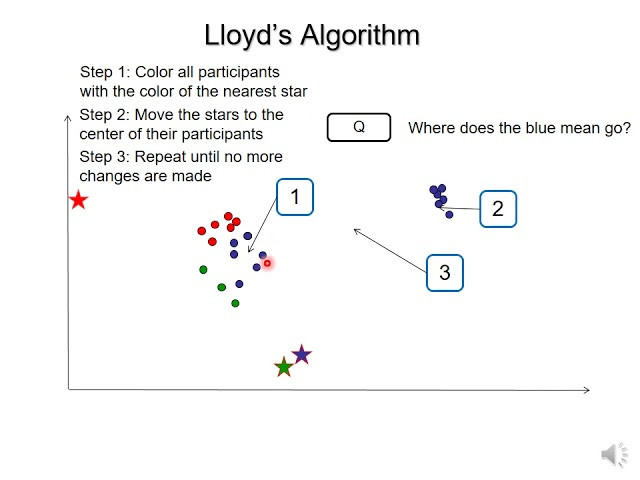

1. Inicializar os centróides (centro de cada cor) aleatoriamente, após definir um K.
2. Calcular a distância e pintar os pontos com o centróide (estrela).
3. Reposicionar o centróide no ponto médio do grupo.
4. Repetir o processo para cada centróide reposicionado, para ver se vai pertencer a um novo grupo.


<br> Calculo de distância: <br>

Distância euclidiana <br>
A distância euclidiana entre dois pontos p e q é:

d(p, q) = √[ (p₁ - q₁)² + (p₂ - q₂)² + ... + (pₙ - qₙ)² ]

<br>

---

pegando o ponto que está em 37 (eixo X) e 1850 (eixo Y). temos: <br>

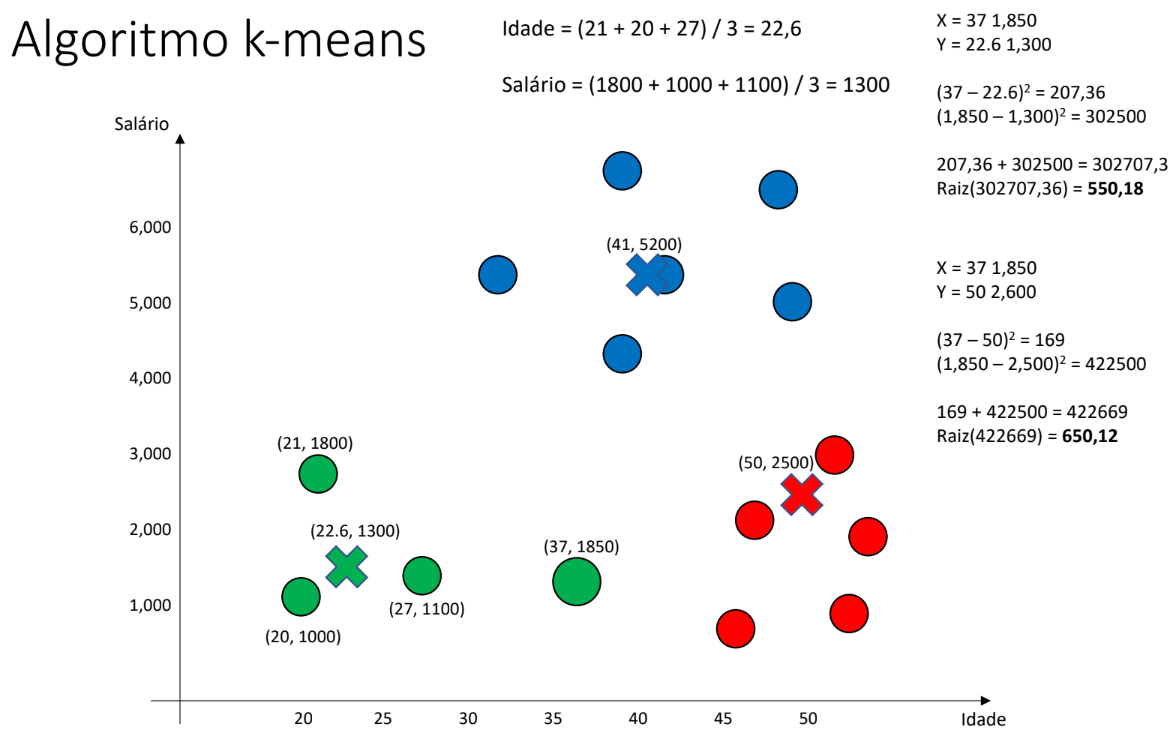


## K-Means++

Evita que pontos iniciais gerem clusters ruins, garantindo que centróides estejam bem distribuídos.

**Funcionamento do K-Means++:**
1. Escolha o primeiro centróide aleatoriamente entre os pontos de dados.
2. Para cada ponto restante, calcule a distância ao centróide mais próximo já escolhido.
3. Escolha o próximo centróide entre os pontos restantes, sendo que pontos mais distantes dos centróides já escolhidos têm maior chance de serem selecionados (probabilidade proporcional ao quadrado da distância).
4. Repita até escolher K centróides.
5. Execute o K-Means normalmente a partir desses centróides.

---

### Exemplo prático com K=3

Suponha que temos os seguintes pontos em 2D:  
A(1,1), B(2,1), C(4,3), D(5,4), E(6,5)  
Queremos 3 clusters (K=3):

1. **Escolha aleatória:** Suponha que o primeiro centróide seja A(1,1).
2. **Distâncias aos centróides:**
   - B: distância até A = 1
   - C: distância até A ≈ 3.6
   - D: distância até A ≈ 5
   - E: distância até A ≈ 6.4
3. **Escolha o próximo centróide:**  
   - Pontos mais distantes (E, D) têm mais chance de serem escolhidos.
   - Suponha que E(6,5) seja escolhido.
4. **Atualize as distâncias para os centróides já escolhidos (A e E):**
   - B: min(distância até A, distância até E) = 1
   - C: min(3.6, 2.8) = 2.8
   - D: min(5, 1.4) = 1.4
5. **Escolha o terceiro centróide:**  
   - C tem a maior distância mínima (2.8), então provavelmente será escolhido.
   - Suponha que C(4,3) seja escolhido.
6. **Agora execute o K-Means normal** usando A(1,1), E(6,5) e C(4,3) como centróides iniciais.

Assim, os centróides iniciais ficam bem distribuídos, melhorando a qualidade dos clusters.


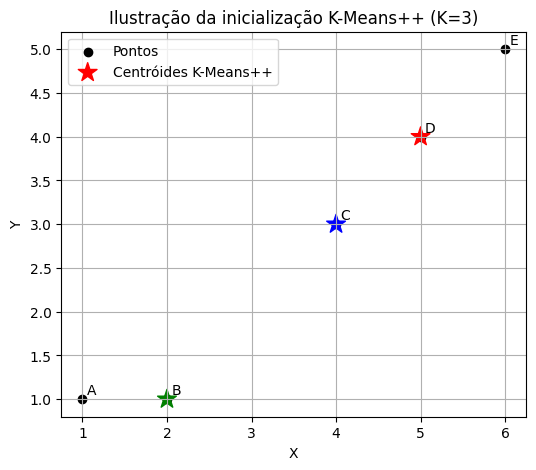

In [1]:
# Exemplo ilustrativo do K-Means++ passo a passo para K=3
import numpy as np
import matplotlib.pyplot as plt

# Pontos do exemplo
points = np.array([
    [1, 1],   # A
    [2, 1],   # B
    [4, 3],   # C
    [5, 4],   # D
    [6, 5]    # E
])
labels = ['A', 'B', 'C', 'D', 'E']

# Passo 1: Escolha aleatória do primeiro centróide
np.random.seed(42)
first_idx = np.random.choice(len(points))
centroids = [points[first_idx]]

# Passo 2: Escolha os próximos centróides usando o critério do K-Means++
for _ in range(2):  # Já temos 1, faltam 2
    # Calcule a distância de cada ponto ao centróide mais próximo já escolhido
    dists = np.array([min(np.linalg.norm(p - c) for c in centroids) for p in points])
    # Probabilidade proporcional ao quadrado da distância (específico do K-Means++)
    probs = dists ** 2 / np.sum(dists ** 2)
    next_idx = np.random.choice(len(points), p=probs)
    centroids.append(points[next_idx])

centroids = np.array(centroids)

# Visualização
plt.figure(figsize=(6, 5))
plt.scatter(points[:, 0], points[:, 1], c='black', label='Pontos')
for i, txt in enumerate(labels):
    plt.annotate(txt, (points[i, 0]+0.05, points[i, 1]+0.05))
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red', 'blue', 'green'], marker='*', s=200, label='Centróides K-Means++')
plt.title('Ilustração da inicialização K-Means++ (K=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Como escolher o número de clusters (K)?

**1. Fórmula de Sturges (adaptada para clustering):**

\[
K \approx 1 + \log_2(n)
\]

Onde \( n \) é o número de amostras.

---

**2. Raiz quadrada de n:**


K ≈ √( n / 2 )

ou, em notação matemática:

\[
K \approx \sqrt{\dfrac{n}{2}}
\]

---

> Essas fórmulas são apenas sugestões iniciais. O valor ideal de K deve ser validado com métodos como o cotovelo (**elbow**) ou índice silhouette.

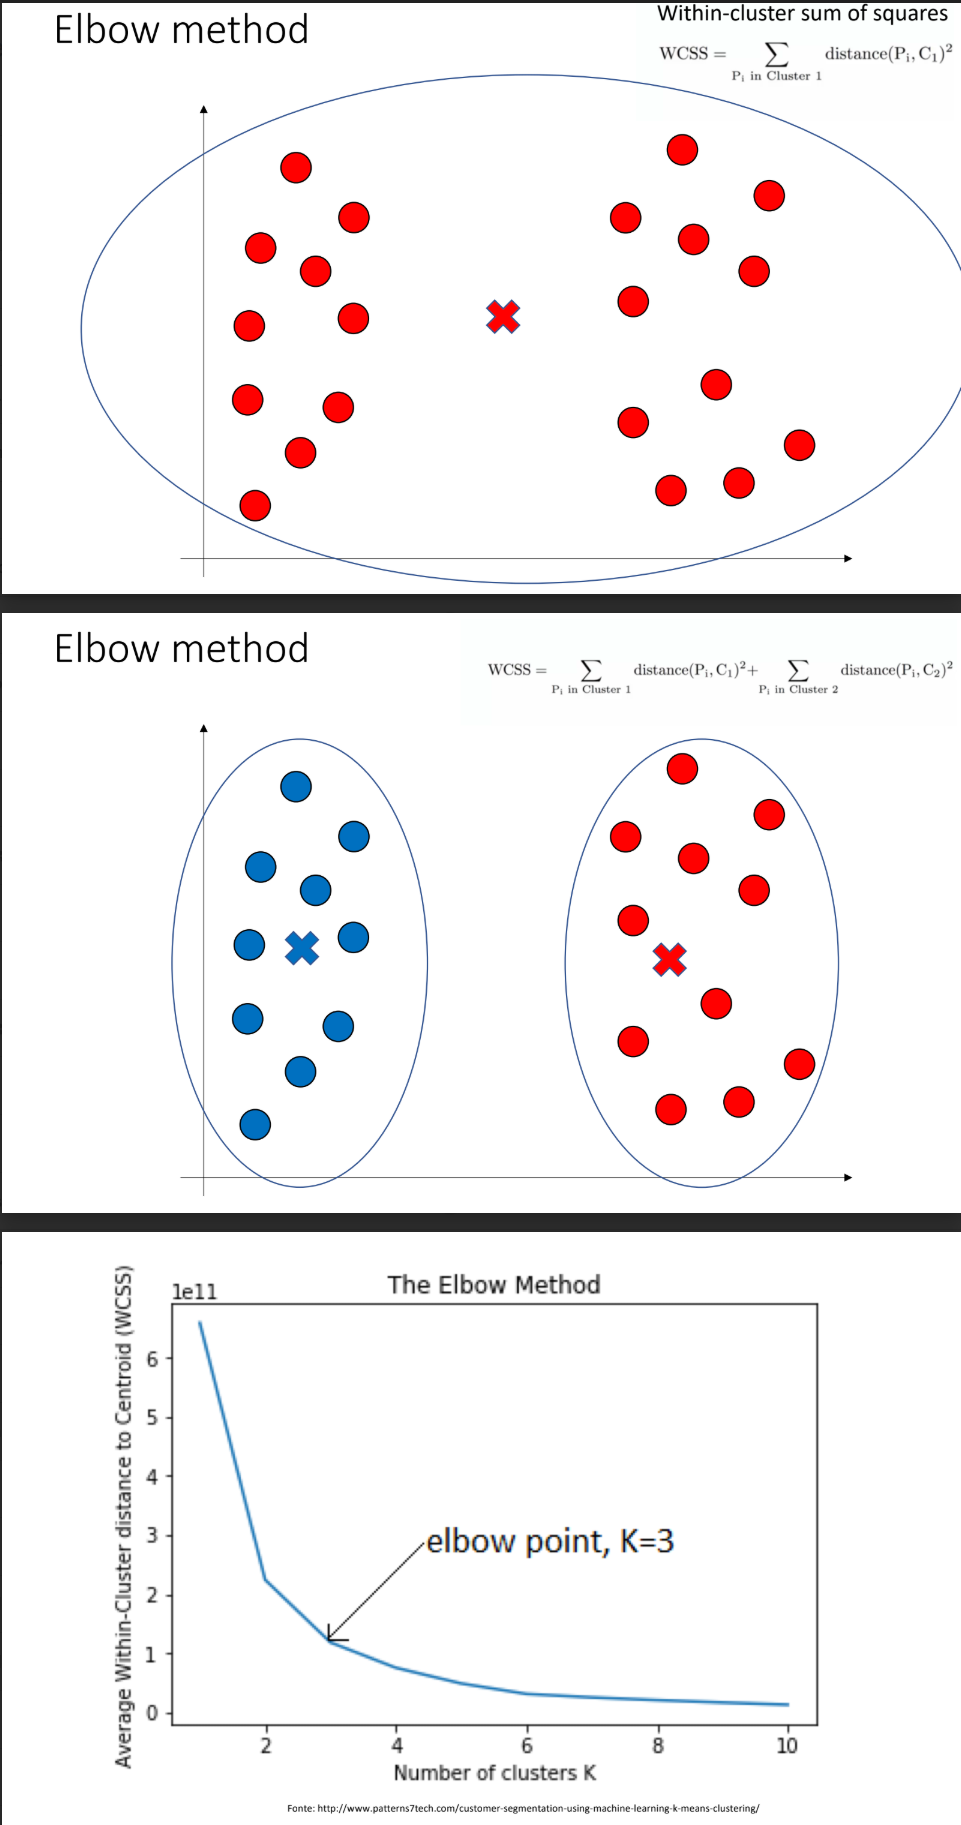


> Quanto maior o valor de WCSS pior a configuração do cluster

## K-means

In [2]:
!pip install plotly.express
!pip install sklearn
!pip install nbformat --upgrade

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [3]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.cluster import KMeans

## Base Idade e Salario 

In [4]:
import numpy as np
import plotly.express as px

np.random.seed(10)

# Geração de idades (x) entre 18 e 65 anos
x = np.random.randint(18, 66, 50) # 50 idades aleatórias

# Salário base cresce com a idade, mas com mais ruído e alguns outliers
y = (x * np.random.uniform(80, 120, size=x.shape)) + np.random.normal(0, 2500, size=x.shape)

# Adicionando alguns outliers (salários muito altos ou baixos para certas idades)
y[3] += 10000   # Outlier positivo
y[10] -= 7000   # Outlier negativo
y[25] += 9000   # Outlier positivo

# Visualização com Plotly Express
fig = px.scatter(x=x, y=y, labels={'x': 'Idade', 'y': 'Salário'}, title='Idade vs Salário (com mais ruído e outliers)')
fig.show()

In [14]:
scaler_x= StandardScaler()
scaler_y = StandardScaler()
x_scaled = scaler_x.fit_transform(np.array(x).reshape(-1, 1))
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

array([[27.],
       [54.],
       [33.],
       [18.],
       [46.],
       [43.],
       [47.],
       [47.],
       [26.],
       [27.],
       [18.],
       [60.],
       [58.],
       [54.],
       [34.],
       [54.],
       [65.],
       [29.],
       [42.],
       [61.],
       [51.],
       [26.],
       [54.],
       [32.],
       [31.],
       [23.],
       [31.],
       [43.],
       [31.],
       [46.],
       [40.],
       [48.],
       [48.],
       [43.],
       [30.],
       [19.],
       [49.],
       [54.],
       [45.],
       [36.],
       [47.],
       [31.],
       [40.],
       [41.],
       [48.],
       [29.],
       [46.],
       [28.],
       [42.],
       [27.]])

In [16]:
kmeans_salario = KMeans(n_clusters=3, random_state=42)
kmeans_salario.fit(np.column_stack((x_scaled, y_scaled)))

KMeans(n_clusters=3, random_state=42)

In [22]:
centroids_salario = kmeans_salario.cluster_centers_
centroids_salario = scaler_x.inverse_transform(centroids_salario[:, 0].reshape(-1, 1)), scaler_y.inverse_transform(centroids_salario[:, 1].reshape(-1, 1))
centroids_salario = np.column_stack(centroids_salario)
display(centroids_salario)

array([[   49.10714286,  4621.24528881],
       [   29.05882353,  1325.01969819],
       [   26.6       , 10834.56001038]])

In [20]:
kmeans_salario.labels_.astype(str)

array(['1', '0', '2', '2', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '2',
       '1', '0', '1', '0', '0', '0', '0', '0', '2', '1', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '2', '0', '1', '0', '1'],
      dtype='<U11')

In [23]:


# Visualização dos clusters com Plotly Express
fig = px.scatter(
    x=x, y=y,
    color=kmeans_salario.labels_.astype(str),  # clusters coloridos
    labels={'x': 'Idade', 'y': 'Salário'},
    title="Clusters de Salário"
)

# Adiciona os centróides em vermelho e com símbolo destacado
fig.add_trace(go.Scatter(
    x=centroids_salario[:, 0],
    y=centroids_salario[:, 1],
    mode='markers',
    marker=dict(color='black', size=16, symbol='star'),
    name='Centróides'
))

fig.show()

## Base Cartão de Crédito

(https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

PAY é o pagamento, os valores de 0 

In [35]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [38]:
dataset_credito=pd.read_excel('data_base/default of credit card clients.xls', header=1)
display(dataset_credito.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

None

In [39]:
display(dataset_credito.info())
dataset_credito = dataset_credito.dropna()  # Remover linhas com valores ausentes
dataset_credito = dataset_credito.drop_duplicates()  # Remover duplicatas
dataset_credito

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

None

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
dataset_credito.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Dicionário de Variáveis - Base de Cartão de Crédito

| Variável                      | Descrição                                                                                                   |
|-------------------------------|-------------------------------------------------------------------------------------------------------------|
| **ID**                        | Identificador único de cada cliente                                                                         |
| **LIMIT_BAL**                 | Valor do crédito concedido em dólares NT (inclui crédito individual e familiar/suplementar)                 |
| **SEX**                       | Sexo (1 = masculino, 2 = feminino)                                                                          |
| **EDUCATION**                 | Escolaridade (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros, 5/6 = desconhecido)        |
| **MARRIAGE**                  | Estado civil (1 = casado, 2 = solteiro, 3 = outros)                                                         |
| **AGE**                       | Idade em anos                                                                                               |
| **PAY_0**                     | Status do reembolso em setembro de 2005<br>(-1 = pagamento em dia, 1 = atraso de 1 mês, ..., 9 = 9+ meses)  |
| **PAY_2**                     | Status do reembolso em agosto de 2005 (mesma escala do PAY_0)                                               |
| **PAY_3**                     | Status do reembolso em julho de 2005 (mesma escala do PAY_0)                                                |
| **PAY_4**                     | Status do reembolso em junho de 2005 (mesma escala do PAY_0)                                                |
| **PAY_5**                     | Status do reembolso em maio de 2005 (mesma escala do PAY_0)                                                 |
| **PAY_6**                     | Status do reembolso em abril de 2005 (mesma escala do PAY_0)                                                |
| **BILL_AMT1**                 | Valor do extrato de conta em setembro de 2005 (dólar NT)                                                    |
| **BILL_AMT2**                 | Valor do extrato de fatura em agosto de 2005 (dólar NT)                                                     |
| **BILL_AMT3**                 | Valor do extrato de fatura em julho de 2005 (dólar NT)                                                      |
| **BILL_AMT4**                 | Valor do extrato de conta em junho de 2005 (dólar NT)                                                       |
| **BILL_AMT5**                 | Valor do extrato de conta em maio de 2005 (dólar NT)                                                        |
| **BILL_AMT6**                 | Valor do extrato de fatura em abril de 2005 (dólar NT)                                                      |
| **PAY_AMT1**                  | Valor do pagamento anterior em setembro de 2005 (dólar NT)                                                  |
| **PAY_AMT2**                  | Valor do pagamento anterior em agosto de 2005 (dólar NT)                                                    |
| **PAY_AMT3**                  | Valor do pagamento anterior em julho de 2005 (dólar NT)                                                     |
| **PAY_AMT4**                  | Valor do pagamento anterior em junho de 2005 (dólar NT)                                                     |
| **PAY_AMT5**                  | Valor do pagamento anterior em maio de 2005 (dólar NT)                                                      |
| **PAY_AMT6**                  | Valor do pagamento anterior em abril de 2005 (dólar NT)                                                     |
| **default.payment.next.month**| Pagamento padrão no próximo mês (1 = sim, 0 = não)                                                          |